<a href="https://colab.research.google.com/github/SushanthOO7/CSE-475/blob/main/CSE475_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 475: Lab 3

In this lab, you will practice implementing to handle imbalanced datasets. You will use methods such as upsampling, downsampling, and SMOTE to balance/augment different datasets (matrix, image, text data) and evaluate how these techniques affect model performance.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button.

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit 1) a link to your Colab notebook, 2) the .ipynb file, and **3) a pdf of the executed notebook** on Canvas. All answers should be shown inside the PDF file [Please refer to Lab 1 for converter tools]

# **PUT YOUR GROUP INFO HERE**

| Group number | Lab 3  Group XXX |            |
|--------------|------------------|------------|
|              | NAME             | ASURITE ID |
| Member 1     | Sushanth Urubailu Vasudeva                  | 1237322494           |
| Member 2     |                  |            |
| Member 3     |                  |            |

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification


In [3]:
# Step 1: Load Dataset
# Using an imbalanced dataset from scikit-learn
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)
data = pd.DataFrame(X, columns=[f'feature{i}' for i in range(1, X.shape[1] + 1)])
data['label'] = y

print("Original Dataset Class Distribution:")
print(data['label'].value_counts())


Original Dataset Class Distribution:
label
0    900
1    100
Name: count, dtype: int64


In [4]:
# Step 2: Train-Test Split
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Balancing Techniques

In [5]:
## Upsampling Minority Class
train_data = pd.concat([X_train, y_train], axis=1)
minority = train_data[train_data['label'] == 1]
majority = train_data[train_data['label'] == 0]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
upsampled_data = pd.concat([majority, minority_upsampled])

In [6]:
print("Upsampled Dataset Class Distribution:")
print(upsampled_data['label'].value_counts())

Upsampled Dataset Class Distribution:
label
0    629
1    629
Name: count, dtype: int64


In [7]:
## Downsampling Majority Class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)
downsampled_data = pd.concat([majority_downsampled, minority])

In [8]:
print("Downsampled Dataset Class Distribution:")
print(downsampled_data['label'].value_counts())

Downsampled Dataset Class Distribution:
label
0    71
1    71
Name: count, dtype: int64


In [9]:
## SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [10]:
print("SMOTE Dataset Class Distribution:")
print(pd.Series(y_smote).value_counts())

SMOTE Dataset Class Distribution:
label
0    629
1    629
Name: count, dtype: int64


In [11]:
# Step 4: Train Classifiers and Evaluate

## Helper function to train and evaluate a model
def train_and_evaluate(X_train, y_train, X_test, y_test, method_name):
    print(f"\nResults for {method_name}:")
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Train and evaluate on original data
train_and_evaluate(X_train, y_train, X_test, y_test, "Original Dataset")

# Train and evaluate on upsampled data
train_and_evaluate(upsampled_data.drop('label', axis=1), upsampled_data['label'], X_test, y_test, "Upsampled Dataset")

# Train and evaluate on downsampled data
train_and_evaluate(downsampled_data.drop('label', axis=1), downsampled_data['label'], X_test, y_test, "Downsampled Dataset")

# Train and evaluate on SMOTE data
train_and_evaluate(X_smote, y_smote, X_test, y_test, "SMOTE Dataset")


Results for Original Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00        29

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[271   0]
 [  0  29]]

Results for Upsampled Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00        29

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[271   0]
 [  0  29]]

Results for Downsampled Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00        29

   

**Question 1: Analyze and compare the results from the different balancing techniques. Which method provided the best balance between precision, recall, and F1-score?**

**Answer:**

All the balancing techinques have the same results.


# Image Data Augmentation



## Installs

In [12]:
#@title Install Dependencies
# !pip install imgaug --quiet
# !pip install torchvision --quiet
!pip install albumentations --quiet
!pip install opencv-python --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


## Env Config

In [13]:
#@title Imports
import albumentations as alb
import cv2
import matplotlib.pyplot as plt
import requests
import numpy as np

In [14]:
#@title Env params

IMG_PATH = 'https://www.gstatic.com/webp/gallery/1.jpg' #@param

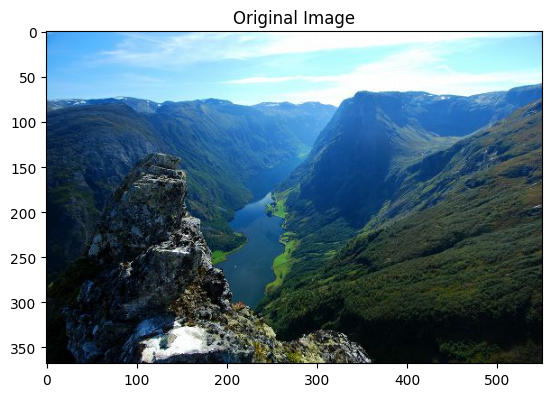

In [15]:


# Fetch the image from the URL
response = requests.get(IMG_PATH, stream=True).raw
image = np.asarray(bytearray(response.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Convert from BGR to RGB for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.show()

## Image Augmentation Options

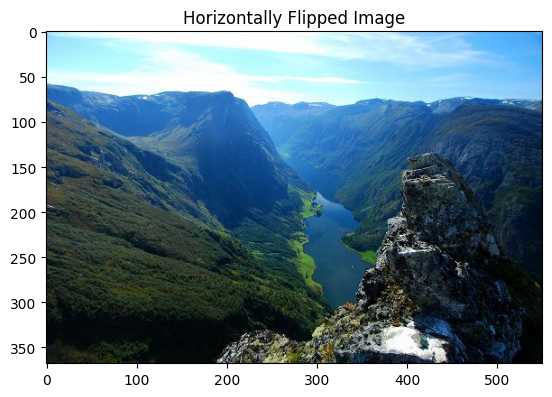

In [16]:
#@title Flipping

# flip horizontally
flip_aug = alb.HorizontalFlip(p=1.0)  # 1.0 means always flip

augmented = flip_aug(image=image)
augmented_image = augmented["image"]

plt.imshow(augmented_image)
plt.title("Horizontally Flipped Image")
plt.show()


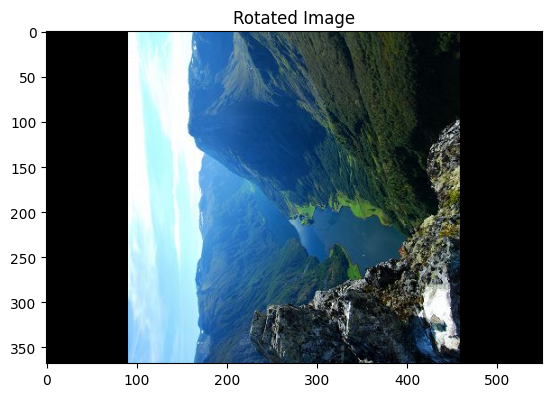

In [17]:
#@title Option 2: Rotation
rotate_aug = alb.Rotate(limit=(90, 90), p=1.0)

augmented = rotate_aug(image=image)
augmented_image = augmented["image"]

plt.imshow(augmented_image)
plt.title("Rotated Image")
plt.show()

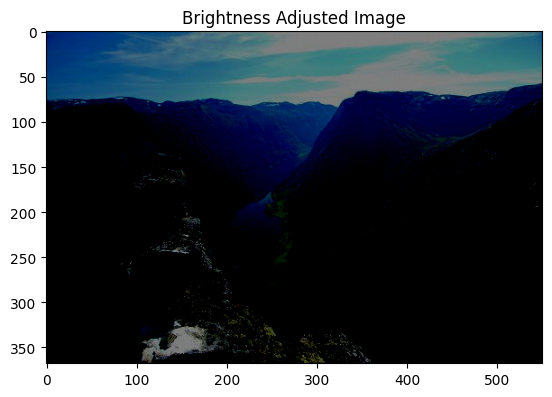

In [18]:
#@title Brightness Adjustment

brightness_aug = alb.RandomBrightnessContrast(brightness_limit=(-0.5, -0.5), contrast_limit=0, p=1.0)

augmented = brightness_aug(image=image)
augmented_image = augmented["image"]

plt.imshow(augmented_image)
plt.title("Brightness Adjusted Image")
plt.show()

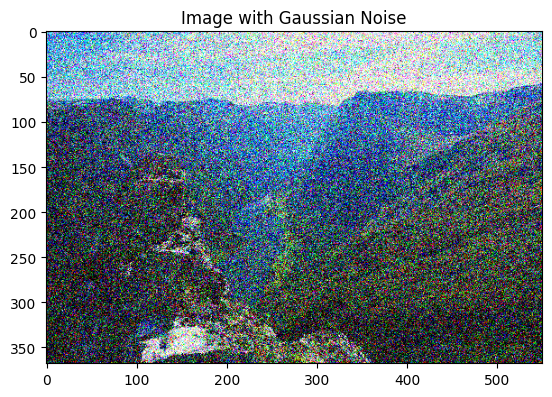

In [19]:
#@title Option 4: Random Noise

std_fixed = 100 / 255.0
noise_aug = alb.GaussNoise(std_range=(std_fixed, std_fixed), p=1.0)

augmented = noise_aug(image=image)
augmented_image = augmented["image"]

plt.imshow(augmented_image)
plt.title("Image with Gaussian Noise")
plt.show()

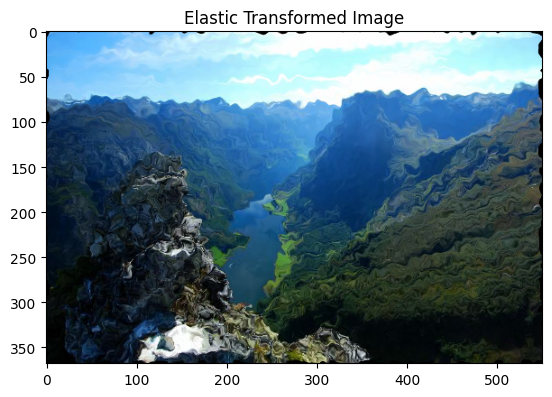

In [20]:
#@title Distortions (Elastic Transformation)

elastic_aug = alb.ElasticTransform(alpha=100, sigma=3, p=1.0)

augmented = elastic_aug(image=image)
augmented_image = augmented["image"]

plt.imshow(augmented_image)
plt.title("Elastic Transformed Image")
plt.show()

# NLP Data Augmentation

## Installs

In [21]:
#@title Install Dependencies
!pip install gensim --quiet
!pip install transformers --quiet
!pip install sacremoses --quiet
!pip install nlpaug --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [22]:
#@title Download Models
from nlpaug.util.file.download import DownloadUtil

# DownloadUtil.download_word2vec(dest_dir = '.')
# Possible values are ‘wiki-news-300d-1M’, ‘wiki-news-300d-1M-subword’, ‘crawl-300d-2M’ and ‘crawl-300d-2M-subword’

DownloadUtil.download_fasttext(dest_dir = '.', model_name = 'crawl-300d-2M')

# for synonym replacement
# DownloadUtil.download_glove(dest_dir = '.', model_name = 'glove.6B')

## Config Env

In [23]:
#@title Imports (restart runtime)
import gensim
print(gensim.__version__)

import transformers

import sacremoses # for back translation tokenizer

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action


4.3.3


In [24]:
#@title Example Sentence for Augmentation

TEXT = "I have been riding my scooter to the store everyday to get bananas." #@param

## Options for NLP Data Augmentation

In [27]:
#@title Option 1: Replace words with other most similar words

# aug = naw.WordEmbsAug(
#   model_type = "word2vec",
#   model_path = "GoogleNews-vectors-negative300.bin",
#   action = "substitute",  # "insert" is another option that doesn't remove og words
#   aug_p = 0.25 # probability of token selection for replacement
#   )

## Other Models you can use
aug = naw.WordEmbsAug(
  model_type = 'fasttext',
  model_path = 'crawl-300d-2M.vec',
  action = "insert"
  )

# aug = naw.WordEmbsAug(
#   model_type = 'glove',
#   model_path = 'glove.6B.300d.txt',
#   action = "substitute"
#   )


# Augment the text
augmented_text = aug.augment(TEXT)
print(f"Original:         {TEXT}\n")
print(f"Augmented Text:   {augmented_text}")

Original:         I have been riding my scooter to the store everyday to get bananas.

Augmented Text:   ['Treforest I have been riding my Anslo scooter Prueher to the store everyday 2.20m to MORTEM get bananas.']


In [28]:
#@title Option 2: Add context words based on nearest embeddings

aug = naw.ContextualWordEmbsAug(
  model_path = 'bert-base-uncased',
  action = "insert",
  aug_p = 0.25
  )

augmented_text = aug.augment(TEXT)

print(f"Original:         {TEXT}\n")
print(f"Augmented Text:   {augmented_text}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The following layers were not sharded: bert.embeddings.word_embeddings.weight, bert.encoder.layer.*.attention.output.dense.weight, bert.encoder.layer.*.attention.self.value.weight, bert.embeddings.token_type_embeddings.weight, bert.encoder.layer.*.attention.self.key.bias, bert.encoder.layer.*.output.dense.weight, bert.encoder.layer.*.intermediate.dense.bias, bert.encoder.layer.*.attention.self.value.bias, cls.predictions.transform.LayerNorm.bias, bert.embeddings.position_embeddings.weight, bert.encoder.layer.*.attention.self.query.weight, bert.encoder.layer.*.attention.output.LayerNorm.bias, cls.predictions.transform.dense.bias, bert.encoder.layer.*.output.LayerNorm.bias, cls.predictions.transform.LayerNorm.weight, bert.encoder.layer.*.output.dense.bias, cls.predictions.decoder.bias, cls.predictions.bias, bert.encoder.layer.*.output.LayerNorm.weight, bert.encoder.layer.*.intermediate.dense.weight, cls.predictions.decoder.weight, bert.embeddings.LayerNorm.weight, bert.encoder.layer.*.at

Original:         I have been riding my scooter to the store everyday to get bananas.

Augmented Text:   ['i have been riding with my scooter down to the store everyday once to get buy bananas.']


In [31]:
#@title Option 3: Synonym Replacement
import nltk
nltk.download("averaged_perceptron_tagger_eng")
aug = naw.SynonymAug(
    aug_src = "wordnet",
    aug_max = 3 # aug_p words too but this allows us to limit how many words are changed
    )
augmented_text = aug.augment(TEXT)

print(f"Original:         {TEXT}\n")
print(f"Augmented Text:   {augmented_text}")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original:         I have been riding my scooter to the store everyday to get bananas.

Augmented Text:   ['I have be riding my sea scooter to the store everyday to get bananas.']


In [32]:
#@title Option 4: Translations (and back translation)

back_translation_aug = naw.BackTranslationAug(
    from_model_name = 'facebook/wmt19-en-de',
    to_model_name = 'facebook/wmt19-de-en'
)

augmented_text = back_translation_aug.augment(TEXT)

print(f"Original:         {TEXT}\n")
print(f"Augmented Text:   {augmented_text}")

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

The following layers were not sharded: model.encoder.layers.*.fc*.bias, model.encoder.layers.*.self_attn.q_proj.weight, model.encoder.layers.*.fc*.weight, model.encoder.layers.*.final_layer_norm.weight, model.decoder.layers.*.self_attn_layer_norm.weight, model.encoder.layers.*.self_attn.q_proj.bias, model.decoder.layers.*.encoder_attn_layer_norm.bias, model.encoder.layers.*.final_layer_norm.bias, model.decoder.layers.*.self_attn.out_proj.bias, model.encoder.embed_positions.weight, model.decoder.embed_positions.weight, model.decoder.layers.*.self_attn.k_proj.bias, model.decoder.layers.*.fc*.bias, model.encoder.layers.*.self_attn_layer_norm.bias, model.decoder.layers.*.encoder_attn.v_proj.weight, model.decoder.output_projection.weight, model.encoder.layers.*.self_attn.k_proj.bias, model.decoder.layers.*.encoder_attn.k_proj.bias, model.encoder.layers.*.self_attn.v_proj.weight, model.decoder.layers.*.self_attn.q_proj.bias, model.decoder.layers.*.encoder_attn.out_proj.bias, model.decoder.la

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

The following layers were not sharded: model.encoder.layers.*.fc*.bias, model.encoder.layers.*.self_attn.q_proj.weight, model.encoder.layers.*.fc*.weight, model.encoder.layers.*.final_layer_norm.weight, model.decoder.layers.*.self_attn_layer_norm.weight, model.encoder.layers.*.self_attn.q_proj.bias, model.decoder.layers.*.encoder_attn_layer_norm.bias, model.encoder.layers.*.final_layer_norm.bias, model.decoder.layers.*.self_attn.out_proj.bias, model.encoder.embed_positions.weight, model.decoder.embed_positions.weight, model.decoder.layers.*.self_attn.k_proj.bias, model.decoder.layers.*.fc*.bias, model.encoder.layers.*.self_attn_layer_norm.bias, model.decoder.layers.*.encoder_attn.v_proj.weight, model.decoder.output_projection.weight, model.encoder.layers.*.self_attn.k_proj.bias, model.decoder.layers.*.encoder_attn.k_proj.bias, model.encoder.layers.*.self_attn.v_proj.weight, model.decoder.layers.*.self_attn.q_proj.bias, model.decoder.layers.*.encoder_attn.out_proj.bias, model.decoder.la

generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Original:         I have been riding my scooter to the store everyday to get bananas.

Augmented Text:   ['I used to go to the shop every day on my scooter to get bananas. I had to get the bananas, but I had to get a lot of the bananas, I had a lot of the bananas, I had a lot of the bananas, I had a lot of the bananas.']
